In [2]:
import cv2, matplotlib

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
#read an image

In [6]:
img = cv2.imread('images/noguchi02.jpg')

In [7]:
#show image format(basicallya 3-d array of pixel color info, in BGR format)

In [8]:
print(img)

[[[ 72  99 143]
  [ 76 103 147]
  [ 78 106 147]
  ..., 
  [159 186 207]
  [160 187 213]
  [157 187 212]]

 [[ 74 101 145]
  [ 77 104 148]
  [ 77 105 146]
  ..., 
  [160 187 208]
  [158 186 210]
  [153 183 208]]

 [[ 76 103 147]
  [ 77 104 148]
  [ 76 104 145]
  ..., 
  [157 181 203]
  [160 188 212]
  [158 186 210]]

 ..., 
 [[ 39  78 130]
  [ 39  78 130]
  [ 40  79 131]
  ..., 
  [193 210 223]
  [195 212 225]
  [197 214 227]]

 [[ 32  71 123]
  [ 32  71 123]
  [ 32  71 123]
  ..., 
  [198 215 228]
  [200 217 230]
  [200 217 230]]

 [[ 39  78 130]
  [ 39  78 130]
  [ 39  78 130]
  ..., 
  [199 216 229]
  [200 217 230]
  [201 218 231]]]


In [9]:
#convert image to RGB color for matplotlib

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
#show image with matplotlib

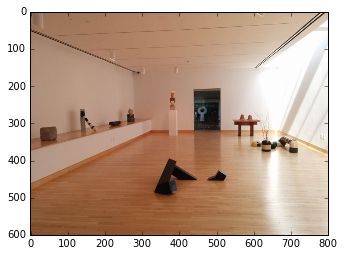

In [12]:
plt.imshow(img)

In [13]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[109 113 115 ..., 189 192 191]
 [111 114 114 ..., 190 190 187]
 [113 114 113 ..., 185 192 190]
 ..., 
 [ 89  89  90 ..., 212 214 216]
 [ 82  82  82 ..., 217 219 219]
 [ 89  89  89 ..., 218 219 220]]


In [14]:
# find average per row, assuming image is already in the RGB format.
# np.average() takes in an axis argument which finds the average across that axis.
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[179 146 123]


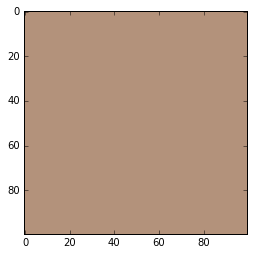

In [15]:
# create 100 x 100 pixel image with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.imshow(average_color_img)

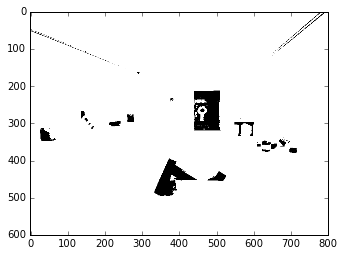

In [16]:
#thresholdfor image, with threshold60
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

#showimage
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_img)

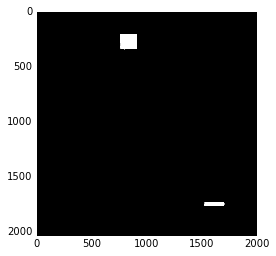

In [17]:
# open new Mondrian Piet painting photo
piet = cv2.imread('images/piet.png')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)
# threshold for hue channel in blue range
blue_min = np.array([100, 100, 100], np.uint8)
blue_max = np.array([140, 255, 255], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_blue_img)

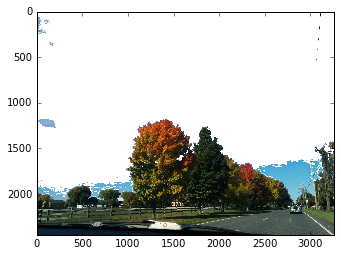

In [18]:
upstate = cv2.imread('images/upstate-ny.jpg')
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

# get maskof pixels  that are  in blue range
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)

#inverse mask to get parts that are not blue
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

In [19]:
img = cv2.imread('images/oy.jpg')

# gaussian blurring with a 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)

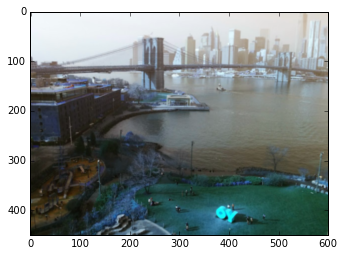

In [20]:
plt.imshow(img_blur_small)

In [22]:
#get binary image and apply Gaussian blur
coins = cv2.imread('images/coins.jpg')
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

# get binary image
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

#invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)

number of coins: 8


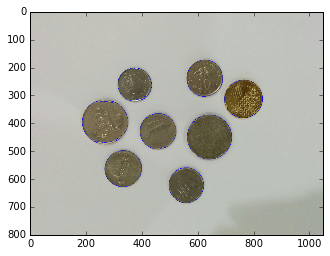

In [29]:
#find contours
_, coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# make copy of image
coins_and_contours = np.copy(coins)

#find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-contour.jpg', coins_and_contours)

# print number of contours
print('number of coins: %d' % len(large_contours))

False

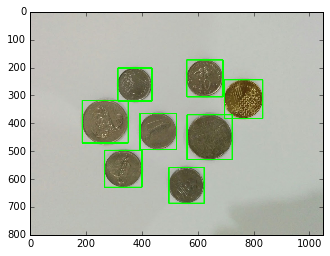

In [31]:
#create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-bounding.jpg', bounding_img)

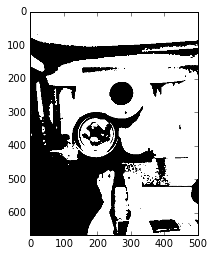

In [32]:
cups = cv2.imread('images/cups.jpg')

# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)

# find binary image with thresholding
_, cups_thresh = cv2.threshold(cups_preprocessed, 80, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))

True

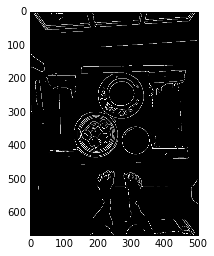

In [33]:
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('cups-edges.jpg', cups_edges)

False

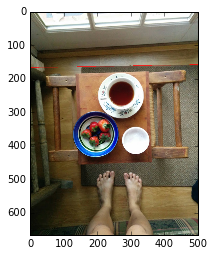

In [35]:
# copy of image to draw lines
cups_lines = np.copy(cups)

# find hough lines
num_pix_threshold = 110 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(cups_edges, 1, np.pi/180, num_pix_threshold)

for rho, theta in lines[0]:
# convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(cups_lines, (x1,y1), (x2,y2), (0,0,255), 1)
    
plt.imshow(cv2.cvtColor(cups_lines, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/cups-lines.jpg', cups_lines)

number of circles detected: 3


False

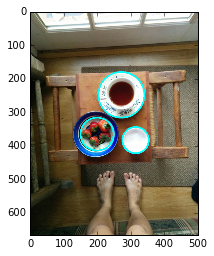

In [38]:
# find hough circles
circles = cv2.HoughCircles(cups_edges, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)

# if circles are detected, draw them
if circles is not None and len(circles) > 0:
    for (x, y, r) in circles[0]:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))

print('number of circles detected: %d' % len(circles[0]))
cv2.imwrite('output/cups-circles.jpg', cups)

In [39]:
exit()